# <h1><font size='18' color='#0122B2'>O problema:</font></h1>


O Brasil é um pais gigante e extremamente diverso, então o primeiro problema é traçar um perfil estadual para compreender as similaridade e diferenças entre eles

<h1><font size='18' color='#0122B2'>Coleta de Dados:</font></h1>


Como fonte de dados temos uma tabela em csv com um compilado de dados orinduos do IBGE, UNDP, Anatel, ministerio do turismo, Denatram, UBER, MC Donalds e Correios. Há um arquvio chamado Data_Dictionary onde contem a fonte de cada coluna e o ano. 


In [1]:
#importanto as bibliotecas
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
import scipy.stats
#Configurar estilo escuro para os graficos
plt.style.use('dark_background')

In [196]:
#capturando os dados
cities_dataframe = pd.read_csv('Data/BRAZIL_CITIES.csv', sep=';')
cities_dataframe[['AREA']]

,AREA
0,147.26
1,881.06
2,"1,045.13"
3,"1,817.07"
4,"1,610.65"
...,...
5568,"5,079.66"
5569,109.39
5570,319.06
5571,"2,140.11"


In [197]:
#Tratando os dados
cities_dataframe.fillna(0, inplace=True)
bolean_dict = {0:False,1:True}
cities_dataframe['CAPITAL'].replace(bolean_dict,inplace=True)
cities_dataframe['AREA']=cities_dataframe['AREA'].fillna(0)

In [198]:
for row in range(len(cities_dataframe)):
    try:    
        cities_dataframe['AREA'].loc[row] = cities_dataframe['AREA'].loc[row].replace(",","")
    except:
        print(cities_dataframe[['AREA']].loc[row])
        
        
cities_dataframe['AREA'] = pd.to_numeric(cities_dataframe['AREA'], downcast='float')

C:\Users\r9kx\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


AREA    0
Name: 2530, dtype: object
AREA    0
Name: 4481, dtype: object
AREA    0
Name: 4605, dtype: object


In [5]:
#Criando um dataframe de dados por estado
states = cities_dataframe['STATE'].unique()
state_dataframe = pd.DataFrame()
state_dataframe['STATE'] = states

In [6]:
#Descobrindo a quantidade de cidades em cada estado
states = cities_dataframe['STATE'].unique()
qty_cities = []
for state in states:
    qty_cities.append(len(cities_dataframe['CITY'][cities_dataframe['STATE']== state]))
state_dataframe['QTY CITIES'] = qty_cities

In [7]:
#Descobrindo a distribuição populacional por estado
total_population = []
for state in states:
 total_population.append(cities_dataframe[['CITY','IBGE_RES_POP']][cities_dataframe['STATE'] == state].sum()[-1])
state_dataframe['TOTAL_POPULATION'] = total_population

In [8]:
#Descobrindo o percentual de cidades e de população
state_dataframe['%CITIES']=round((state_dataframe['QTY CITIES']/state_dataframe['QTY CITIES'].sum())*100,2)
state_dataframe['%POPULATION'] = round((state_dataframe['TOTAL_POPULATION']/state_dataframe['TOTAL_POPULATION'].sum())*100,2)


In [9]:
#Descobrindo a quantidade de cidades com Macdonalds e UBER e o percentual de cidades com acesso à esses serviços
qty_cities_with_uber = []
for state in states:
    qty_cities_with_uber.append(cities_dataframe[['CITY','UBER']][cities_dataframe['UBER']==1][cities_dataframe['STATE']== state].sum()[-1])

state_dataframe['QTY CITIES WITH UBER'] = qty_cities_with_uber
state_dataframe['% CITIES WITH UBER'] = round(state_dataframe['QTY CITIES WITH UBER']/state_dataframe['QTY CITIES']*100,2)

qty_cities_with_mcdonalds = []
for state in states:
    qty_cities_with_mcdonalds.append(cities_dataframe[['CITY','MAC']][cities_dataframe['MAC']>=1][cities_dataframe['STATE']== state].count()[1])

state_dataframe['QTY CITIES WITH MACDONALDS'] = qty_cities_with_mcdonalds
state_dataframe['% CITIES WITH MACDONALDS'] = round(state_dataframe['QTY CITIES WITH MACDONALDS']/state_dataframe['QTY CITIES']*100,2)

C:\Users\r9kx\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\Users\r9kx\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()


In [10]:
#Descobrindo a populaçao urbana composição percentual
urban_pop = []
for state in states:
   urban_pop.append(cities_dataframe[['IBGE_POP']][cities_dataframe['STATE']==state].sum()[0])
state_dataframe['URBAN POPULATION'] = urban_pop
state_dataframe['%URBAN POPULATION'] = round(state_dataframe['URBAN POPULATION']/state_dataframe['TOTAL_POPULATION']*100,2)

In [11]:
#Descobrindo o IDH Medio e Mediano dos estados
idh_mean = []
for state in states:
    idh_mean.append(round(cities_dataframe[['IDHM']][cities_dataframe['STATE']==state].mean()[0],3))
state_dataframe['MEAN IDH'] = idh_mean
idh_median = []
for state in states:
    idh_median.append(round(cities_dataframe[['IDHM']][cities_dataframe['STATE']==state].median()[0],3))
state_dataframe['MEDIAN IDH'] = idh_median


In [12]:
#Adcionando informação de região:
region = ['Centro Oeste','Sudeste','Norte','Nordeste','Nordeste','Sul','Sul','Nordeste','Norte','Nordeste','Nordeste','Nordeste','Sul','Centro Oeste','Norte','Sudeste','Sudeste','Nordeste','Nordeste','Centro Oeste','Norte','Norte','Norte','Norte','Nordeste','Sudeste','Centro Oeste']
state_dataframe['REGION'] = region

#Info de Região no Daframe de cidades:
citie_region = []
for row in range(len(cities_dataframe)):    
   citie_region.append((state_dataframe['REGION'][state_dataframe['STATE'] == cities_dataframe.loc[row][1]]).to_string(index=False)[1:])

cities_dataframe['REGION']=citie_region

<h1><font size='18' color='#0122B2'>Analise dos Dados:</font></h1>

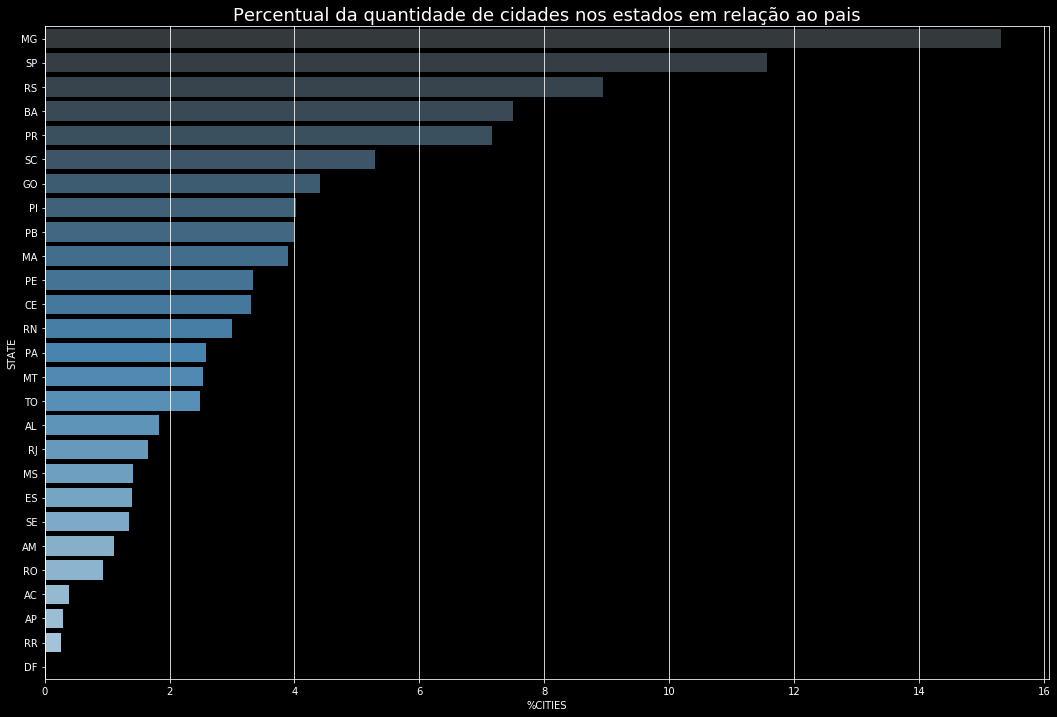

In [13]:
plt.figure(figsize=(18,12))
plt.title('Percentual da quantidade de cidades nos estados em relação ao pais', fontsize=18)
sns.barplot(y='STATE', x='%CITIES', data=state_dataframe.sort_values(by=['%CITIES'],ascending=False),palette="Blues_d")
plt.grid(axis='x', linestyle='-')
plt.show()

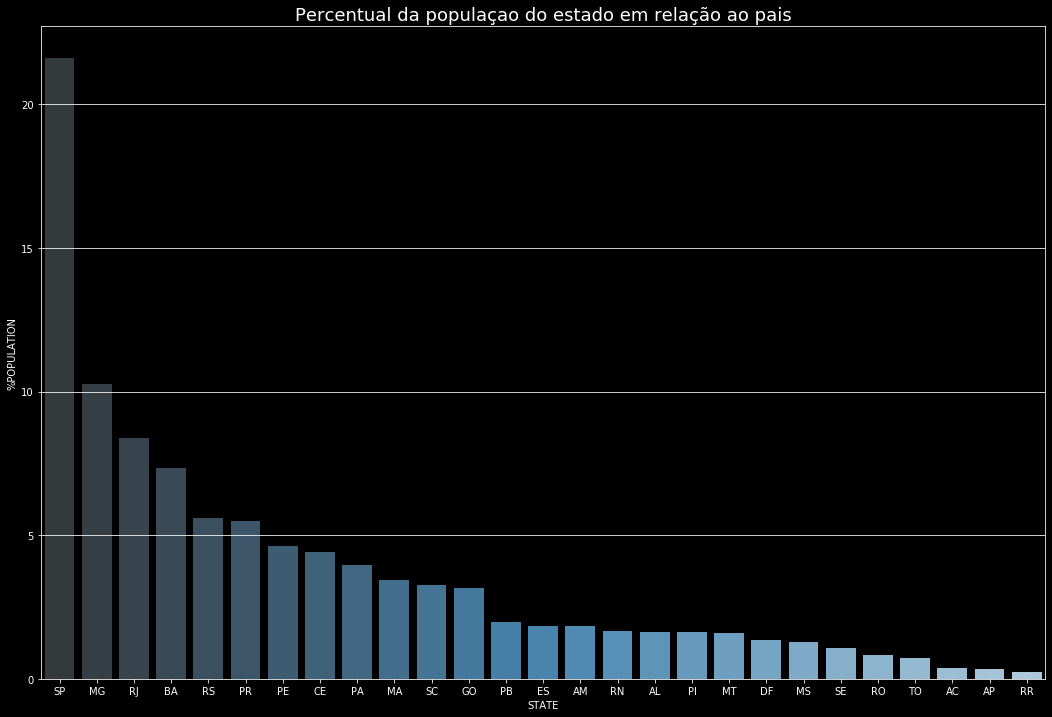

In [14]:
plt.figure(figsize=(18,12))
sns.barplot(x='STATE', y='%POPULATION', data=state_dataframe.sort_values(by=['%POPULATION'],ascending=False),palette="Blues_d")
plt.title('Percentual da populaçao do estado em relação ao pais', fontsize=18)
plt.grid(axis='y',linestyle='-')
plt.show()

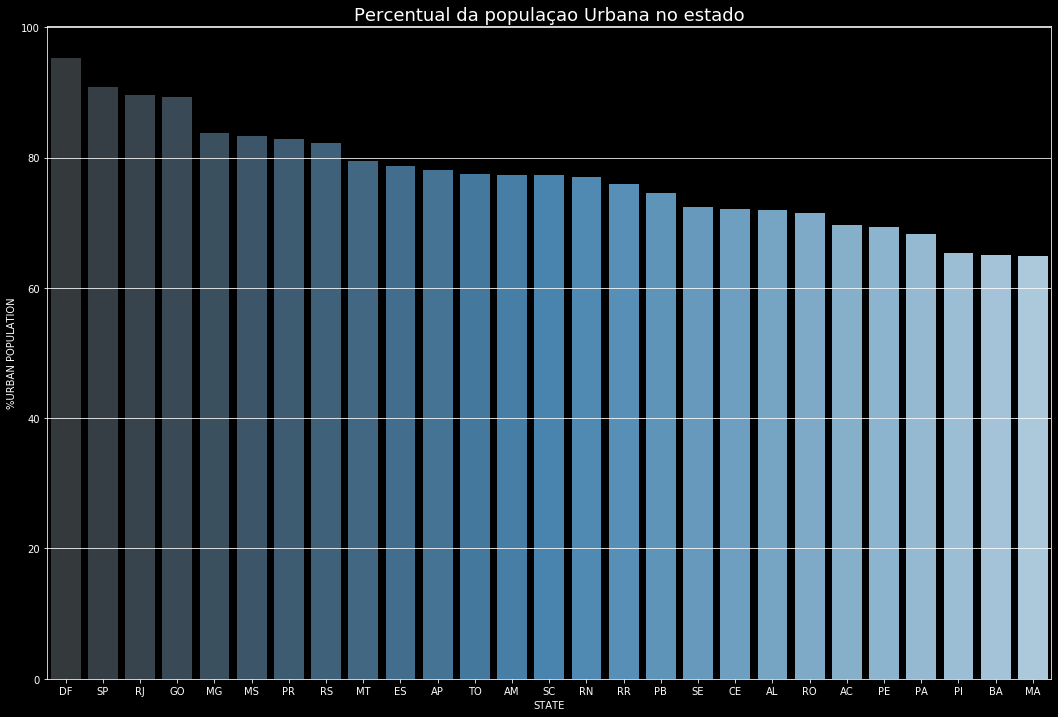

In [15]:
plt.figure(figsize=(18,12))
sns.barplot(x='STATE', y='%URBAN POPULATION', data=state_dataframe.sort_values(by=['%URBAN POPULATION'],ascending=False),palette="Blues_d")
plt.grid(axis='y',linestyle='-')
plt.title('Percentual da populaçao Urbana no estado', fontsize=18)
plt.show()

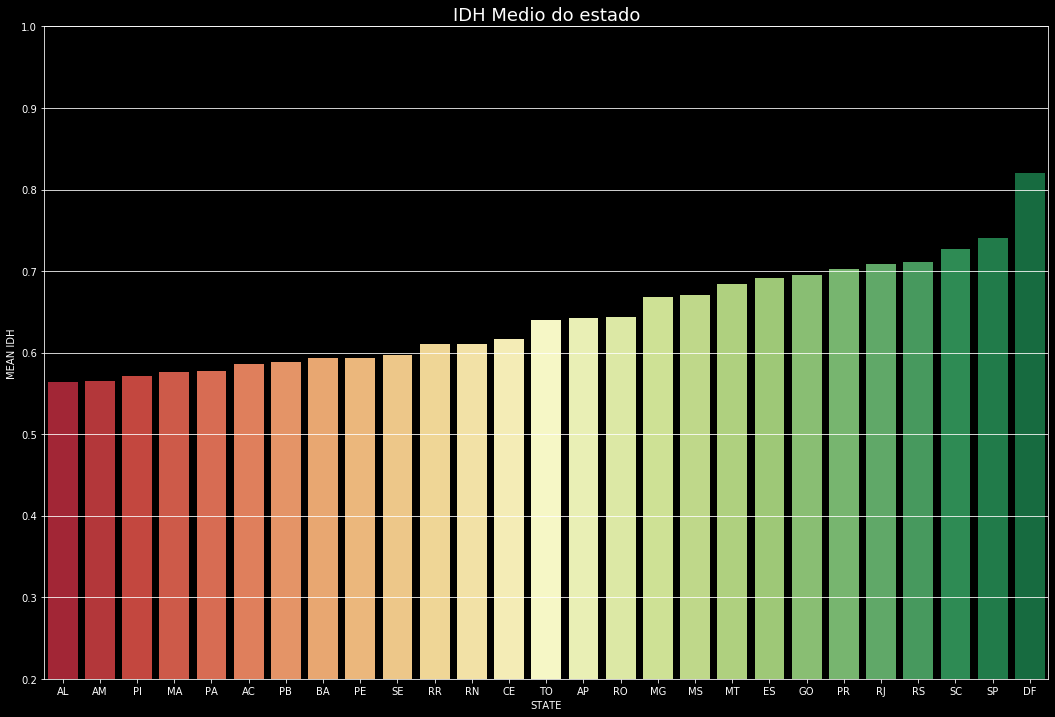

In [16]:
plt.figure(figsize=(18,12))
plt.ylim(0.2,1)
plt.title("IDH por estado")
sns.barplot(x='STATE', y='MEAN IDH', data=state_dataframe.sort_values(by=['MEAN IDH']),palette="RdYlGn")
plt.grid(axis='y',linestyle='-')
plt.title('IDH Medio do estado', fontsize=18)
plt.show()

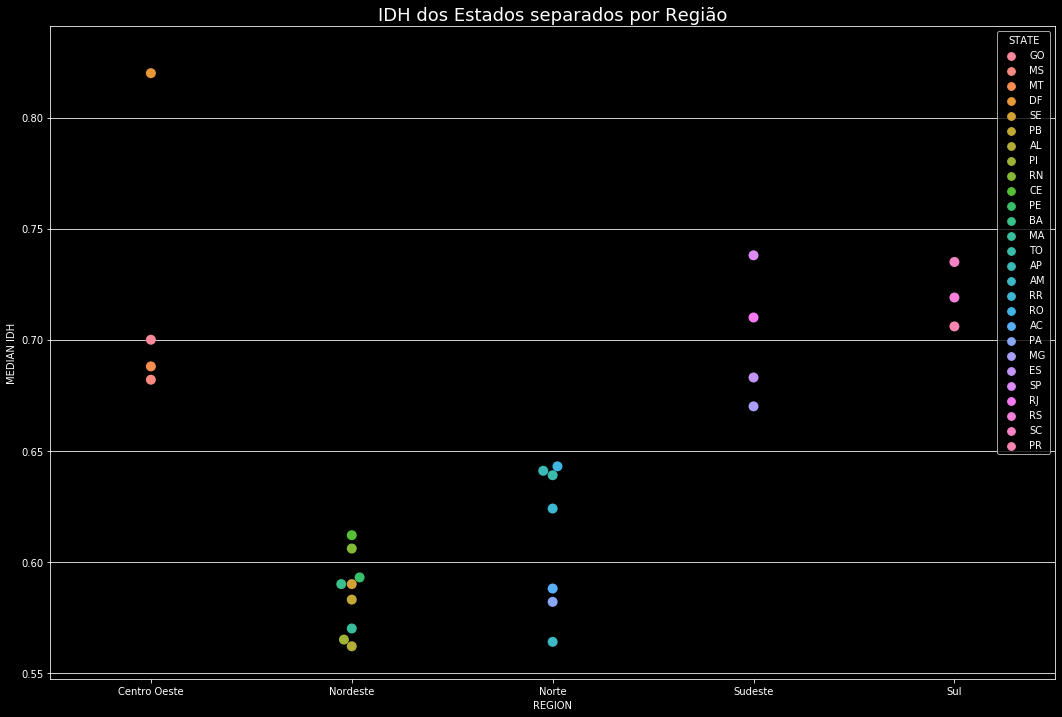

In [17]:
plt.figure(figsize=(18,12))
plt.title('IDH dos Estados separados por Região',fontsize=18)
sns.swarmplot(x='REGION', y='MEDIAN IDH',hue='STATE', data=state_dataframe.sort_values(by=['REGION']),size=10)
plt.grid(axis='y',linestyle='-')

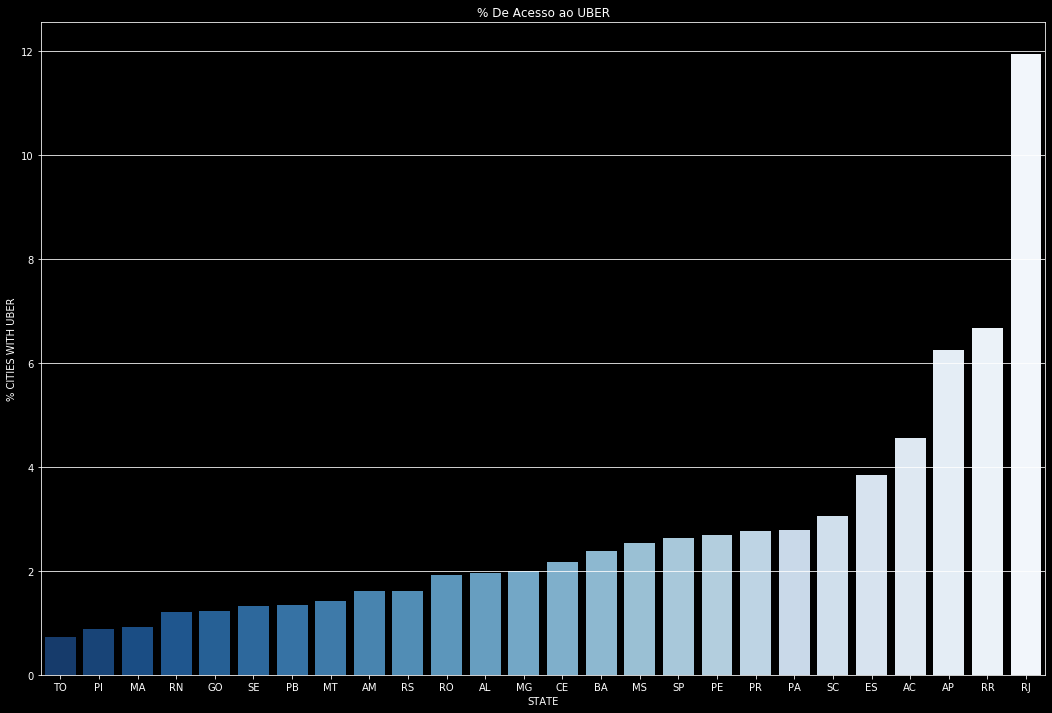

In [29]:
plt.figure(figsize=(18,12))
plt.title("% De Acesso ao UBER")
sns.barplot(x='STATE', y='% CITIES WITH UBER', data=state_dataframe.drop([26]).sort_values(by=['% CITIES WITH UBER']),palette="Blues_r")
plt.grid(axis='y',linestyle='-')
plt.show()

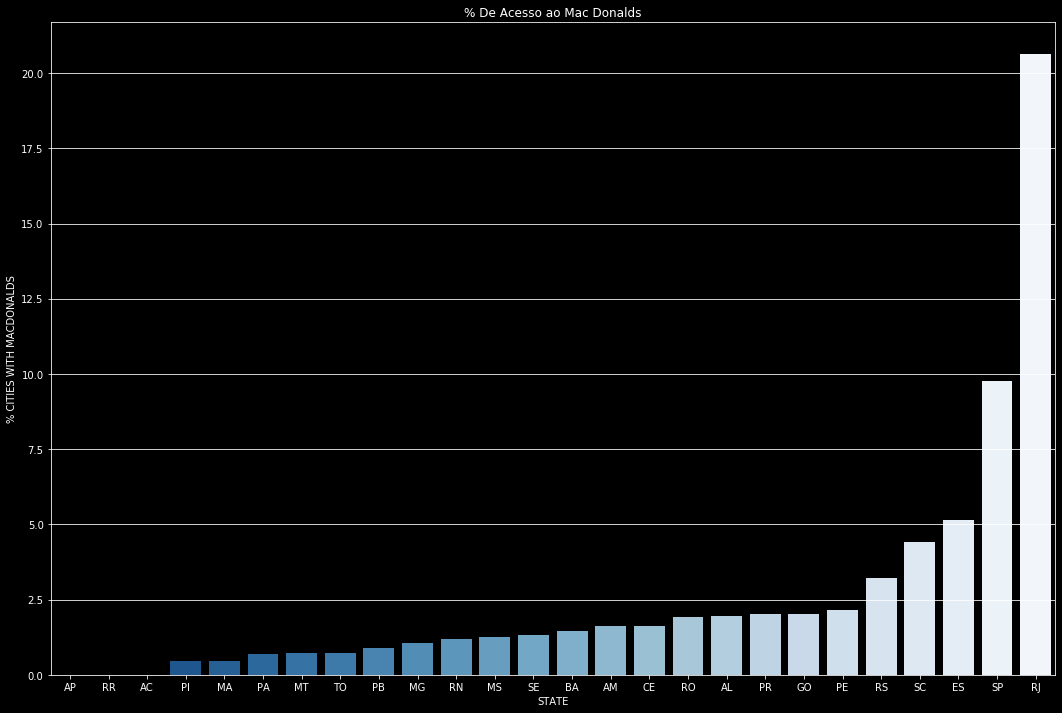

In [30]:
plt.figure(figsize=(18,12))
plt.title("% De Acesso ao Mac Donalds")
sns.barplot(x='STATE', y='% CITIES WITH MACDONALDS', data=state_dataframe.drop([26]).sort_values(by=['% CITIES WITH MACDONALDS']),palette="Blues_r")
plt.grid(axis='y',linestyle='-')
plt.show()

Agora podemos gerar os graficos das cidades, assim podemos obter informações mais precisas e avaliar as nuances dentro do mesmo estado:

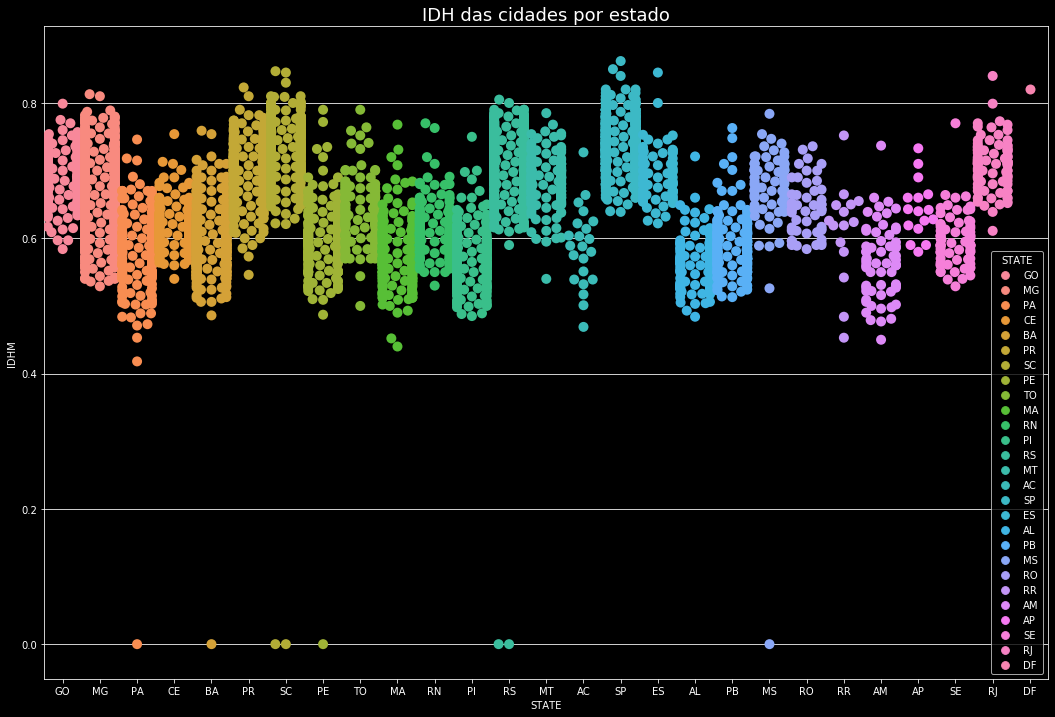

In [20]:
plt.figure(figsize=(18,12))
plt.title('IDH das cidades por estado',fontsize=18)
sns.swarmplot(x='STATE', y='IDHM',hue='STATE', data=cities_dataframe,size=10)
plt.grid(axis='y',linestyle='-')

E as nuances dentro da mesma região:

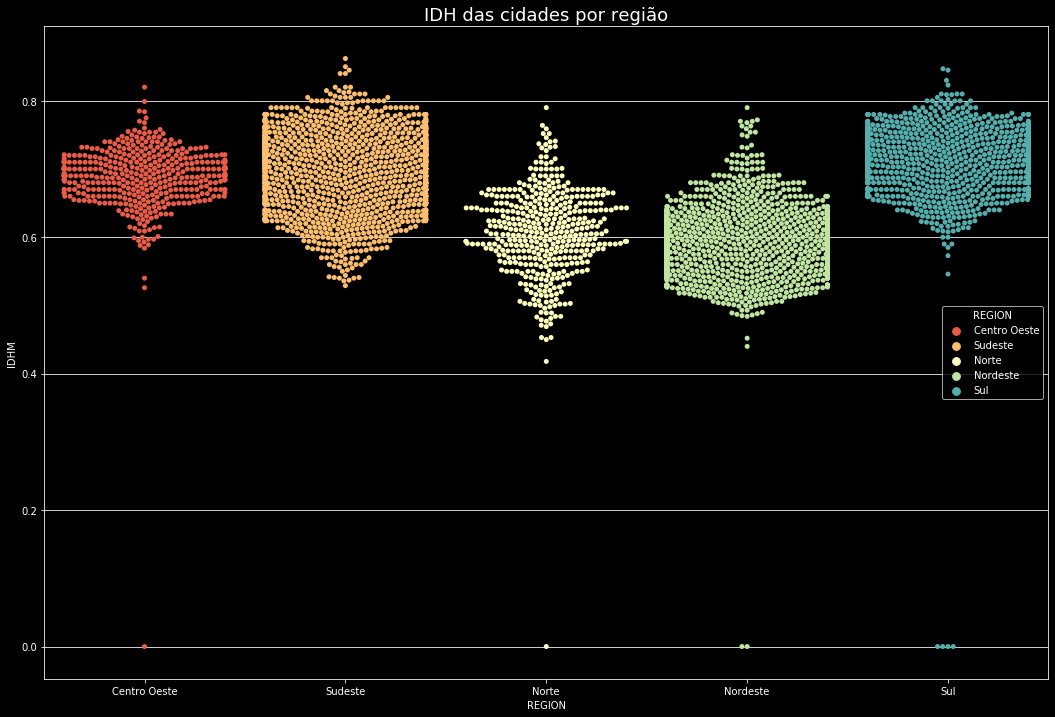

In [21]:
plt.figure(figsize=(18,12))
plt.title('IDH das cidades por região',fontsize=18)
sns.swarmplot(x='REGION', y='IDHM',hue='REGION', data=cities_dataframe, palette="Spectral")
plt.grid(axis='y',linestyle='-')

Aplicando clustering a populaçao dos municipios com o  IDH:

In [22]:
idh_population_cluster = cities_dataframe[['IDHM','IBGE_RES_POP']]


kmeans = KMeans(n_clusters=6, random_state=1)
kmeans.fit(idh_population_cluster.iloc[:,:-1])


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

plt.figure(figsize=(18,12))
plt.yticks([0,0.4,0.5,0.6,0.7,0.8,0.9,1])
sns.scatterplot(x='IBGE_RES_POP', y='IDHM', data=idh_population_cluster, hue=kmeans.labels_,palette=("gist_rainbow_r"))
plt.xscale('log')
plt.xticks([500,1000,10000,100000,1000000,12000000])
plt.grid(axis='y',linestyle='-')
plt.grid(axis='x',linestyle='--')
plt.show()


Criando a função para teste dos postos sinalizados de Wilcoxon para comparativo de amostras

In [24]:
def wilcoxon(data1,data2):
   wilcoxon_result = scipy.stats.ranksums(data1, data2).pvalue.round(5)
   if wilcoxon_result <= 0.050:
    return print('Resultado do teste: {}'.format(wilcoxon_result) ,'\nAmostras de grupos distintos')
   else:
    return print('Resultado do teste: {}'.format(wilcoxon_result) ,'\nAmostras do mesmo grupo')
    

Analises comparativas:

Hipotese 1: IDH médio do estado tem relação direta com a populaçao URBANIZADA:

In [34]:
#Usando wilcoxon para comparar as amostras
wilcoxon(state_dataframe['%URBAN POPULATION'],state_dataframe['MEAN IDH'])

Resultado do teste: 0.0 
Amostras de grupos distintos


Hipotese 2: IDH da cidade tem relação direta com a populaçao URBANIZADA:

In [44]:
PERCENT_URBAN_POPULATION = round(cities_dataframe['IBGE_DU_URBAN']/cities_dataframe['IBGE_RES_POP']*100,2)
wilcoxon(PERCENT_URBAN_POPULATION,cities_dataframe['IDHM'])

Resultado do teste: 0.0 
Amostras de grupos distintos


HIPOTESE 3: 

<h1><font size='18' color='#0122B2'>Resultados:</font></h1>

In [56]:
float(cities_dataframe.AREA.head(30))

TypeError: cannot convert the series to <class 'float'>

In [45]:
state_dataframe

,STATE,QTY CITIES,TOTAL_POPULATION,%CITIES,%POPULATION,QTY CITIES WITH UBER,% CITIES WITH UBER,QTY CITIES WITH MACDONALDS,% CITIES WITH MACDONALDS,URBAN POPULATION,%URBAN POPULATION,MEAN IDH,MEDIAN IDH,REGION
0,GO,246,6003788.0,4.41,3.15,3.0,1.22,5,2.03,5359161.0,89.26,0.695,0.700,Centro Oeste
1,MG,853,19597330.0,15.31,10.27,17.0,1.99,9,1.06,16413877.0,83.76,0.668,0.670,Sudeste
2,PA,144,7581051.0,2.58,3.97,4.0,2.78,1,0.69,5178838.0,68.31,0.578,0.582,Norte
3,CE,184,8452381.0,3.30,4.43,4.0,2.17,3,1.63,6098608.0,72.15,0.617,0.612,Nordeste
4,BA,418,14016906.0,7.50,7.35,10.0,2.39,6,1.44,9121262.0,65.07,0.593,0.590,Nordeste
5,PR,399,10444526.0,7.16,5.48,11.0,2.76,8,2.01,8657837.0,82.89,0.702,0.706,Sul
6,SC,295,6248436.0,5.29,3.28,9.0,3.05,13,4.41,4827021.0,77.25,0.727,0.735,Sul
7,PE,186,8796448.0,3.34,4.61,5.0,2.69,4,2.15,6101331.0,69.36,0.593,0.593,Nordeste
8,TO,139,1383445.0,2.49,0.73,1.0,0.72,1,0.72,1071578.0,77.46,0.640,0.639,Norte
9,MA,217,6574789.0,3.89,3.45,2.0,0.92,1,0.46,4269744.0,64.94,0.576,0.570,Nordeste
